In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
rcParams['figure.figsize']=16,10
# LETS LOAD EVERYTHING
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor, XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor

In [2]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw = pd.read_csv('housing.csv', header=None, delimiter=r'\s+', names=cols)
raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
raw.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

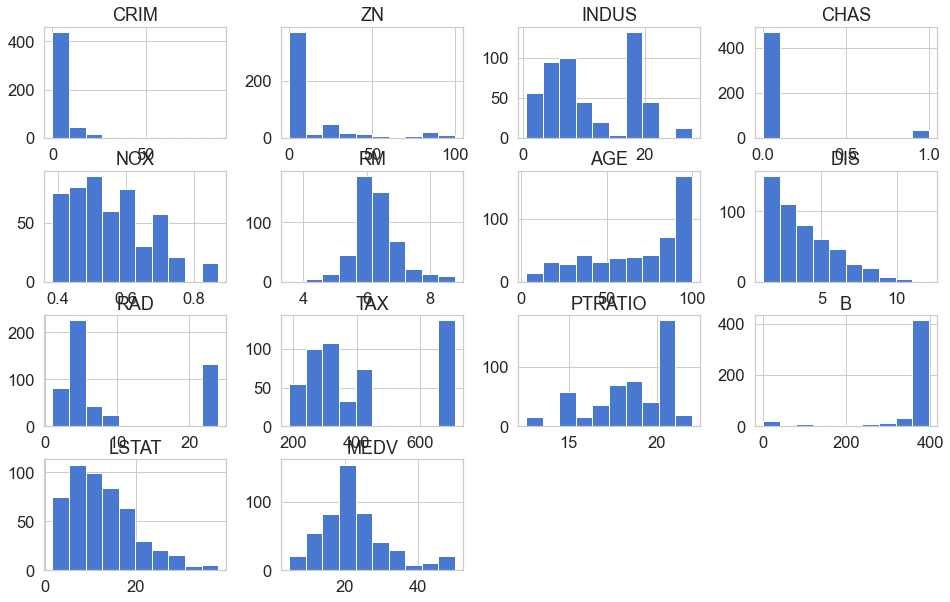

In [4]:
raw.hist()

(array([ 12.,  45., 109.,  94.,  58.,  38.,  44.,  66.,  32.,   8.]),
 array([-5.06403607, -4.10879557, -3.15355507, -2.19831457, -1.24307408,
        -0.28783358,  0.66740692,  1.62264742,  2.57788792,  3.53312842,
         4.48836892]),
 <BarContainer object of 10 artists>)

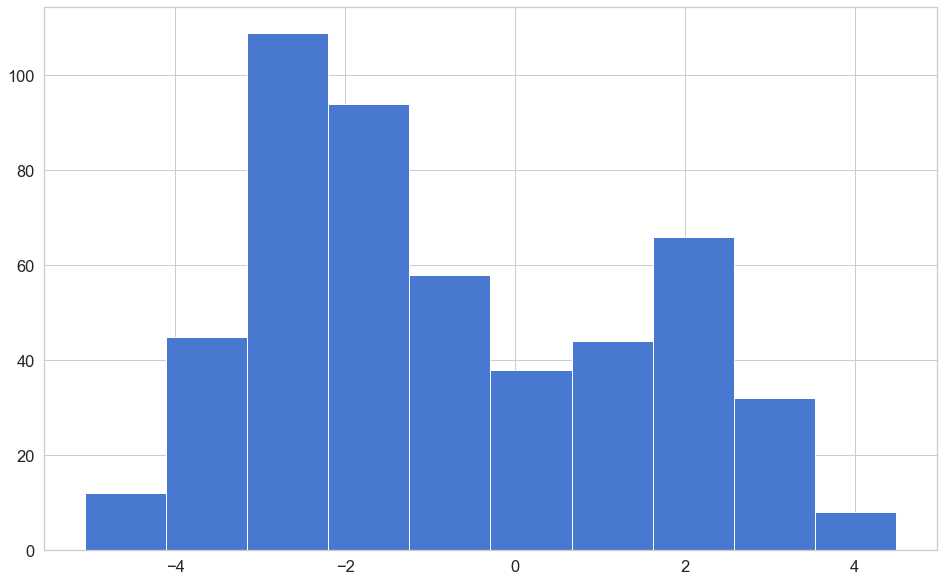

In [5]:
plt.hist(np.log(raw['CRIM']))


In [6]:
cols_to_log = []
cols_to_log.append('CRIM')

In [7]:
raw['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

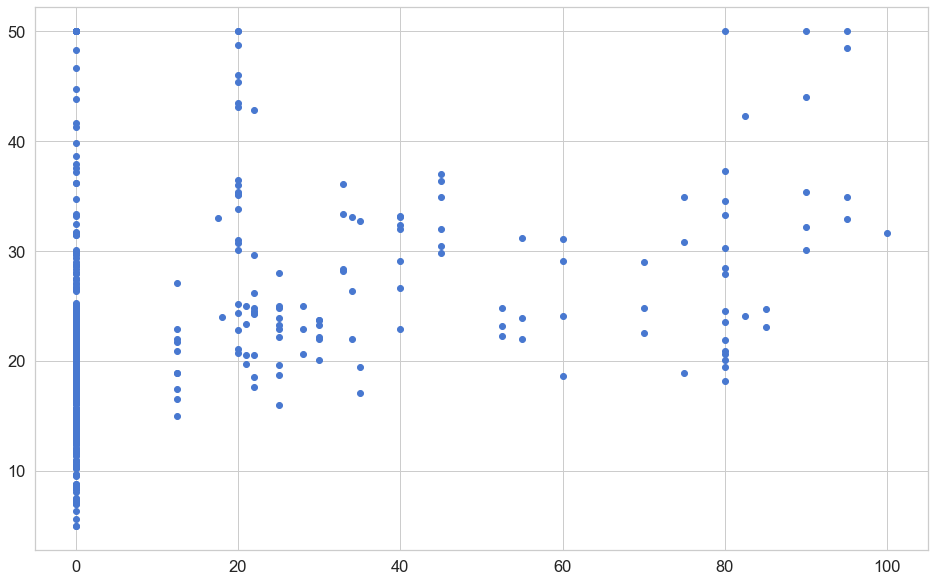

In [8]:
plt.scatter(x=raw['ZN'],y=raw['MEDV'])
plt.show()

(array([10.,  2., 35., 13., 16.,  7.,  9.,  7., 21., 14.]),
 array([2.52572864, 2.7336728 , 2.94161695, 3.14956111, 3.35750526,
        3.56544942, 3.77339357, 3.98133772, 4.18928188, 4.39722603,
        4.60517019]),
 <BarContainer object of 10 artists>)

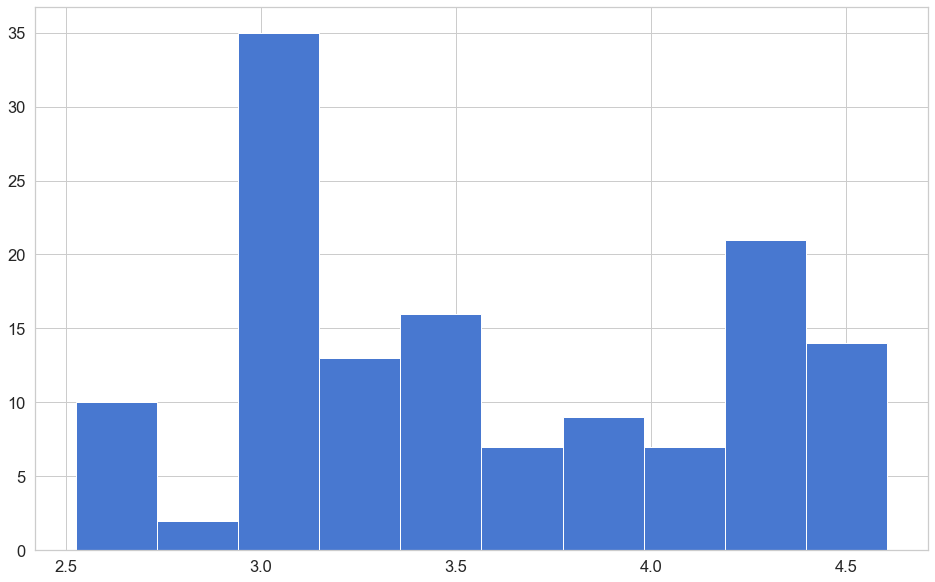

In [9]:
temp = raw[raw['ZN']>0]['ZN']
plt.hist(np.log(temp))

In [10]:
raw1=raw.copy()
raw['ZN'].replace(0,0.9999, inplace=True)
raw['ZN'].value_counts()

0.9999      372
20.0000      21
80.0000      15
12.5000      10
25.0000      10
22.0000      10
40.0000       7
30.0000       6
45.0000       6
90.0000       5
95.0000       4
21.0000       4
60.0000       4
33.0000       4
35.0000       3
28.0000       3
55.0000       3
52.5000       3
70.0000       3
34.0000       3
75.0000       3
82.5000       2
85.0000       2
17.5000       1
100.0000      1
18.0000       1
Name: ZN, dtype: int64

In [11]:
cols_to_log.append('ZN')

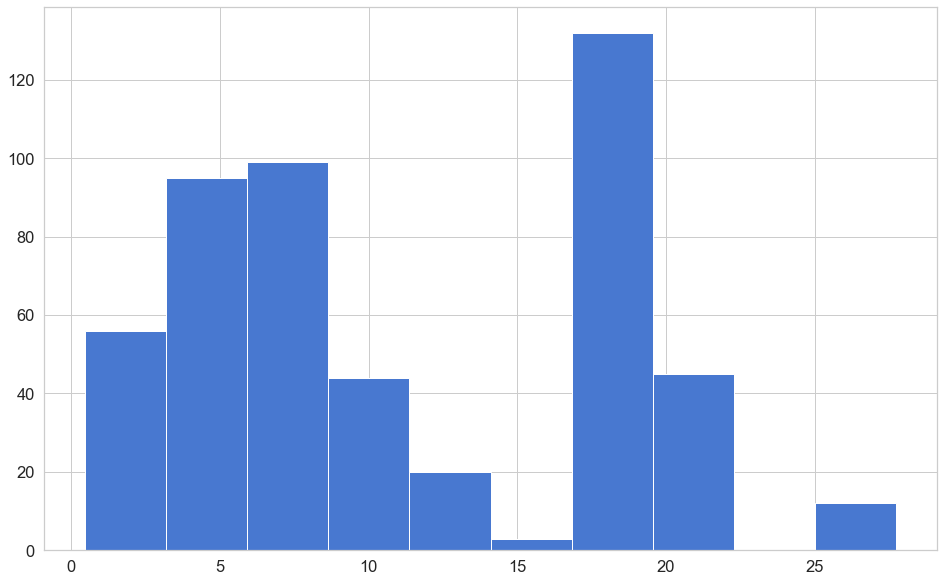

In [12]:
plt.hist((raw['INDUS']))
plt.show()

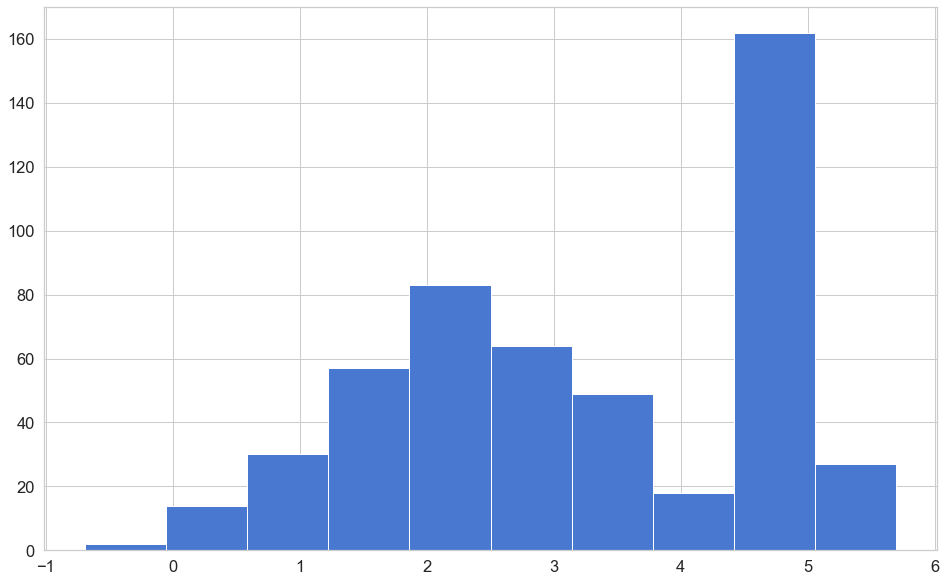

In [13]:
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
from scipy.special import boxcox
plt.hist(boxcox(raw['INDUS'], 0.3))
plt.show()


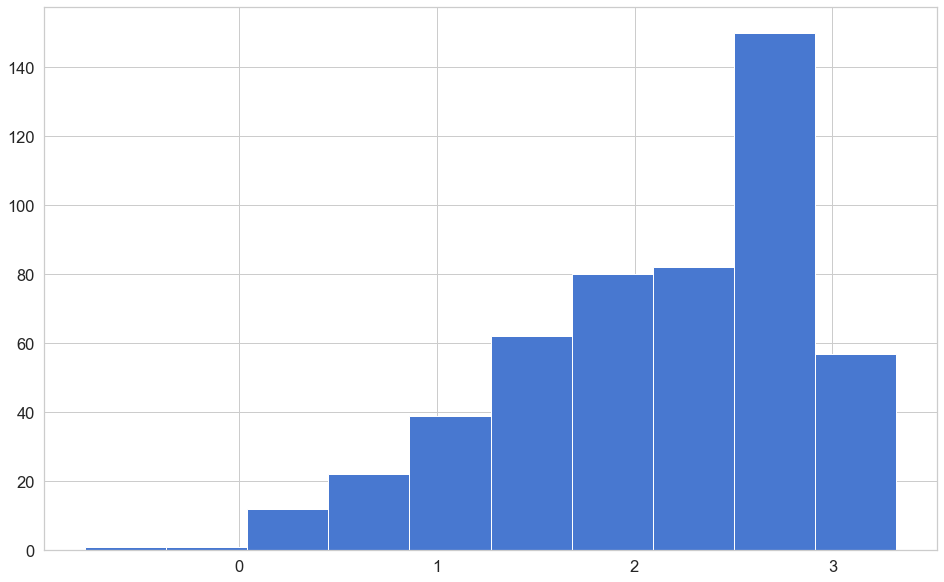

In [14]:
plt.hist(np.log(raw['INDUS']))
plt.show() #better

In [15]:
cols_to_log.append('INDUS')

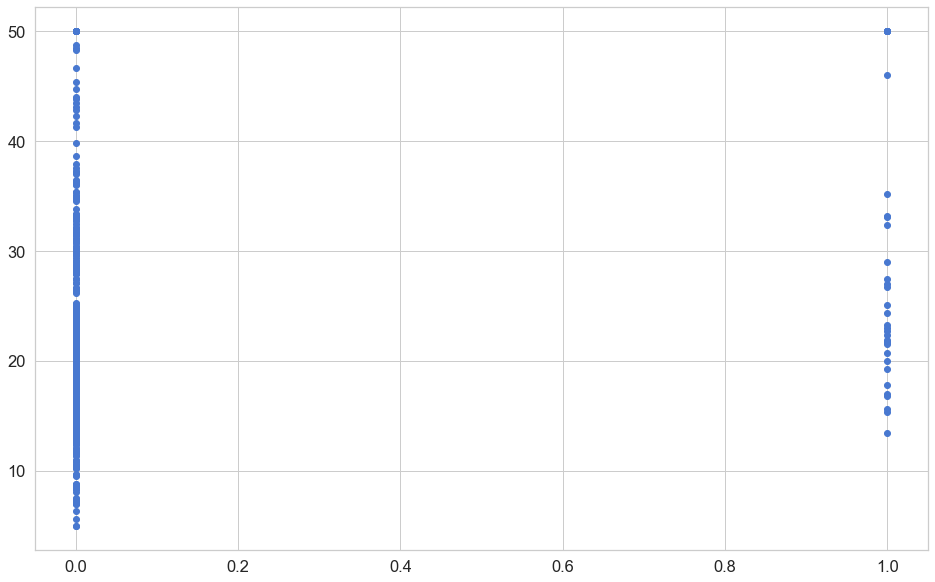

In [16]:
plt.scatter(x=raw['CHAS'],y=raw['MEDV'])
plt.show()

In [17]:
add = pd.get_dummies(raw['CHAS'])

In [18]:
add.columns = ['CHAS0','CHAS1']
raw = pd.concat((raw, add), axis=1)
raw.drop('CHAS', axis=1, inplace=True)
raw.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS0,CHAS1
0,0.00632,18.0000,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.9999,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1,0
2,0.02729,0.9999,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.9999,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.9999,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1,0


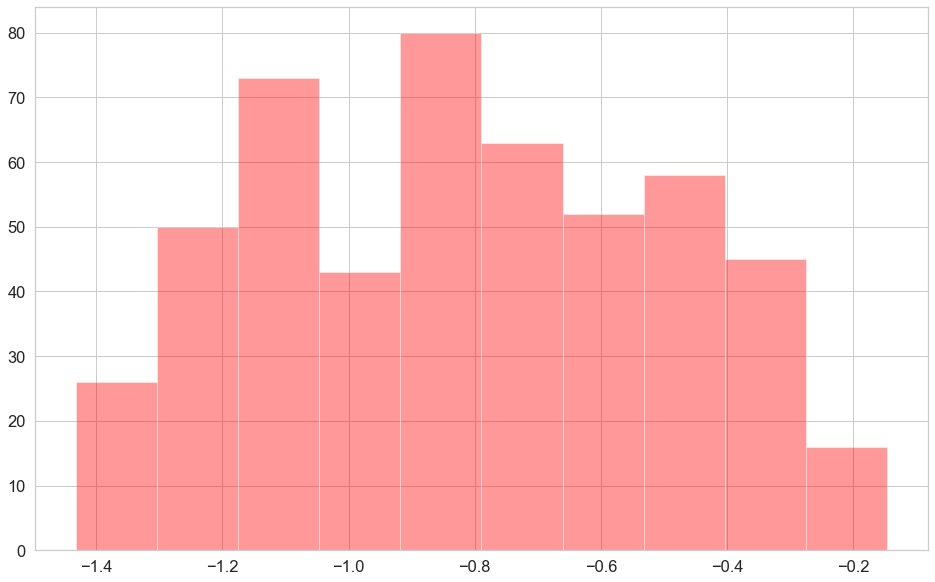

In [19]:
#plt.hist(boxcox(raw['NOX'], boxcox_normmax(raw['NOX'])+1.002),alpha=0.4)
plt.hist(boxcox(raw['NOX'],-0.8),color='red',alpha=0.4)
#plt.hist(np.log(raw['NOX']),color='yellow',alpha=0.4)
plt.show()

In [20]:
raw['NOX'] = boxcox(raw['NOX'],-0.8)

In [21]:
raw.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CHAS0', 'CHAS1'],
      dtype='object')

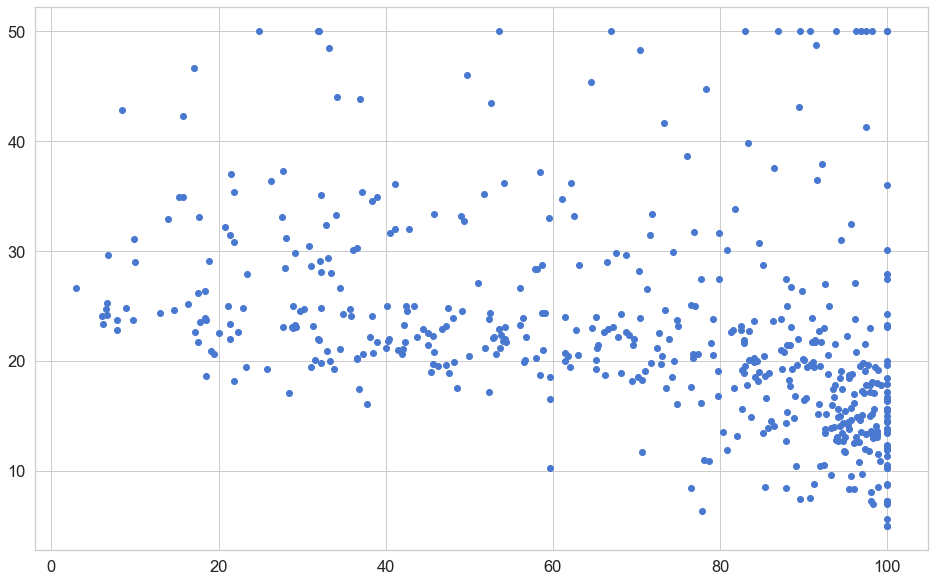

In [22]:
plt.scatter(x=raw['AGE'], y=raw['MEDV']) #the newer the higher but a lot of old ones, will just leave it
plt.show()

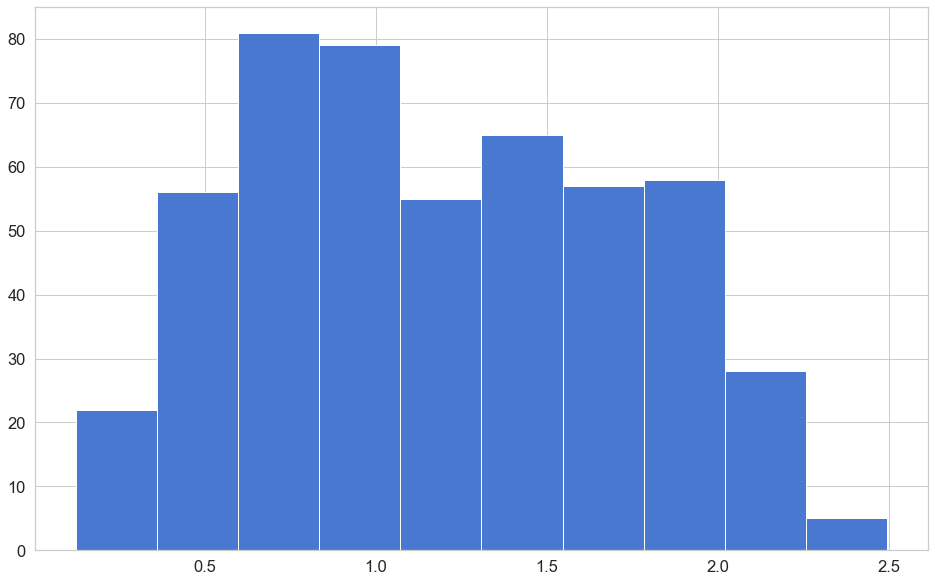

In [23]:
plt.hist(np.log(raw['DIS']))
plt.show()

In [24]:
cols_to_log.append('DIS')

In [25]:
raw['RAD'] = pd.cut(raw['RAD'],bins=[0,11,50],labels = [0,1])
add = pd.get_dummies(raw['RAD'])
add.columns = ['RADLOW','RADHIGH']
raw = pd.concat((raw,add),axis=1)
raw.drop('RAD', axis=1, inplace=True)
raw.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,CHAS0,CHAS1,RADLOW,RADHIGH
0,0.00632,18.0000,2.31,-0.802505,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,1,0,1,0
1,0.02731,0.9999,7.07,-1.040719,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,1,0,1,0
2,0.02729,0.9999,7.07,-1.040719,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,1,0,1,0
3,0.03237,0.9999,2.18,-1.084628,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,1,0,1,0
4,0.06905,0.9999,2.18,-1.084628,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,1,0,1,0


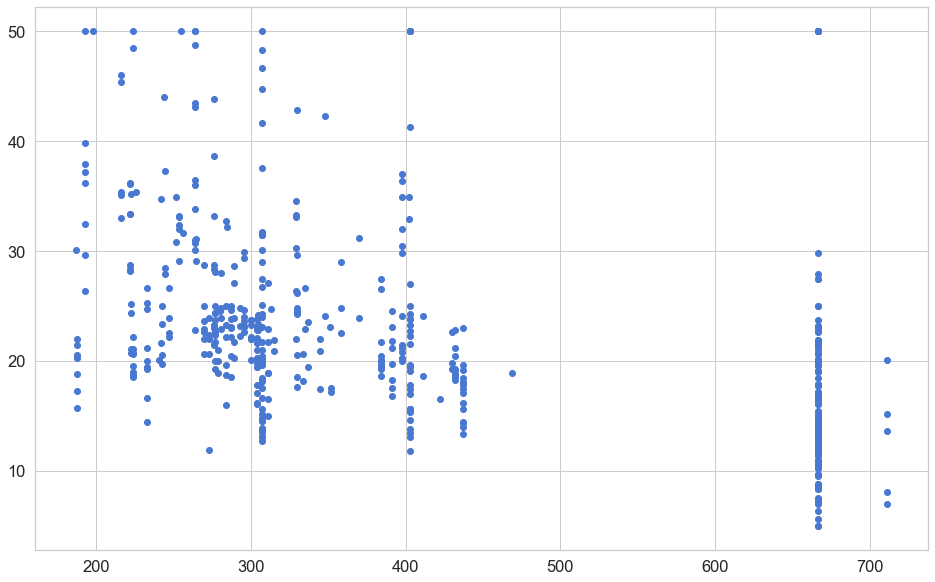

In [26]:
plt.scatter(x=raw['TAX'],y=raw['MEDV'])
plt.show()

In [27]:
raw['TAX'] = pd.cut(raw['TAX'],bins=[0,500,800],labels = [0,1])
add = pd.get_dummies(raw['TAX'])
add.columns = ['TAXLOW','TAXHIGH']
raw = pd.concat((raw,add),axis=1)
raw.drop('TAX', axis=1, inplace=True)
raw.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV,CHAS0,CHAS1,RADLOW,RADHIGH,TAXLOW,TAXHIGH
0,0.00632,18.0000,2.31,-0.802505,6.575,65.2,4.0900,15.3,396.90,4.98,24.0,1,0,1,0,1,0
1,0.02731,0.9999,7.07,-1.040719,6.421,78.9,4.9671,17.8,396.90,9.14,21.6,1,0,1,0,1,0
2,0.02729,0.9999,7.07,-1.040719,7.185,61.1,4.9671,17.8,392.83,4.03,34.7,1,0,1,0,1,0
3,0.03237,0.9999,2.18,-1.084628,6.998,45.8,6.0622,18.7,394.63,2.94,33.4,1,0,1,0,1,0
4,0.06905,0.9999,2.18,-1.084628,7.147,54.2,6.0622,18.7,396.90,5.33,36.2,1,0,1,0,1,0


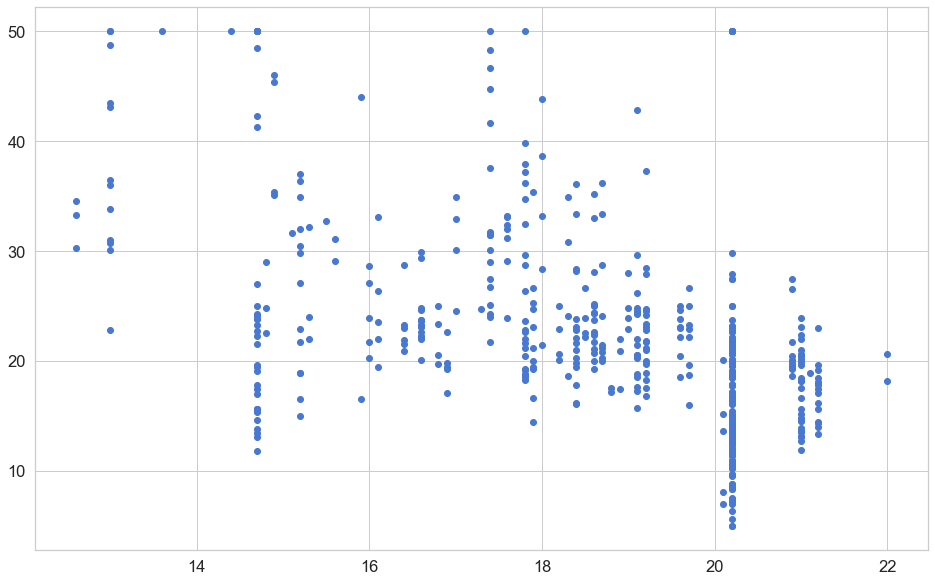

In [28]:
plt.scatter(x=raw['PTRATIO'],y=raw['MEDV']) #interesting
plt.show()

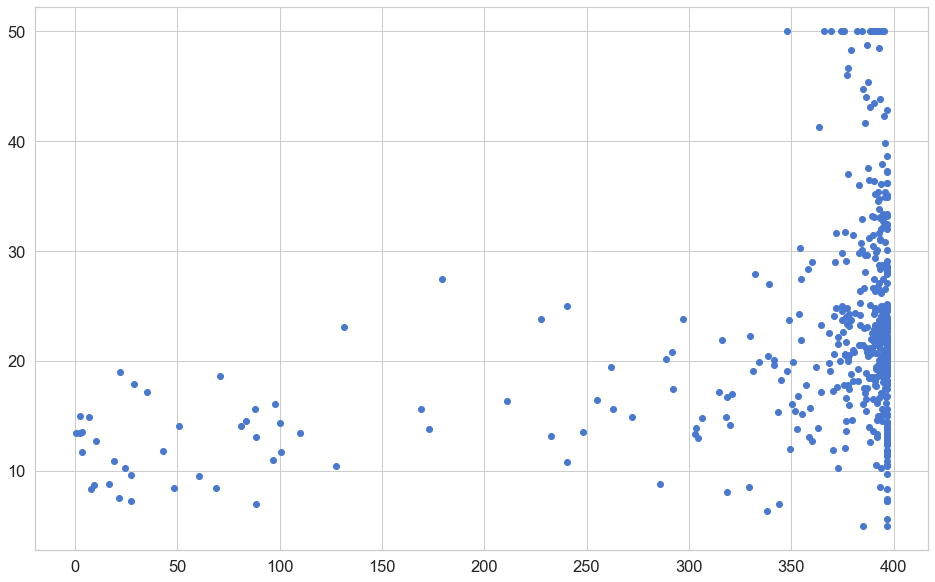

In [29]:
plt.scatter(x=raw['B'],y=raw['MEDV']) #VERY UNEXPECTED LOL
plt.show()

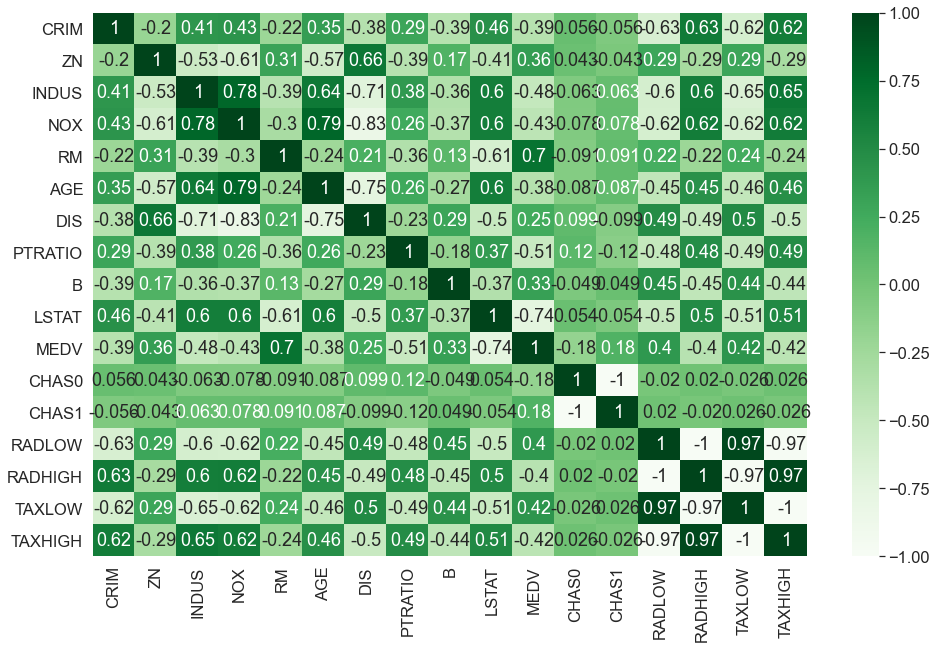

In [30]:
sns.heatmap(raw.corr(),cmap='Greens',annot=True)
plt.show()

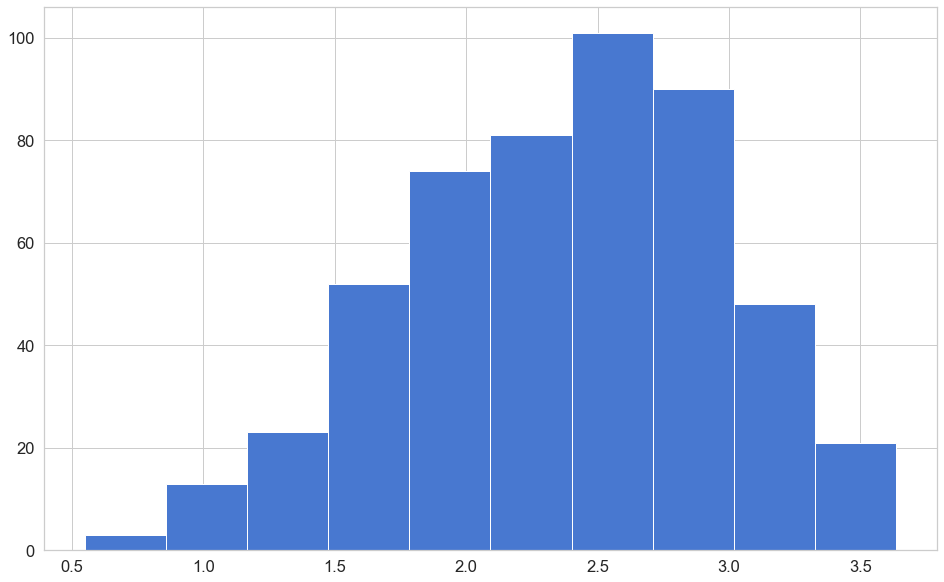

In [31]:
plt.hist(np.log(raw['LSTAT']))
plt.show()

In [32]:
cols_to_log.append('LSTAT')
cols_to_log

['CRIM', 'ZN', 'INDUS', 'DIS', 'LSTAT']

In [33]:
raw2 = raw.copy()

In [34]:
raw[cols_to_log] = np.log(raw[cols_to_log])
raw.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV,CHAS0,CHAS1,RADLOW,RADHIGH,TAXLOW,TAXHIGH
0,-5.064036,2.890372,0.837248,-0.802505,6.575,65.2,1.408545,15.3,396.90,1.605430,24.0,1,0,1,0,1,0
1,-3.600502,-0.000100,1.955860,-1.040719,6.421,78.9,1.602836,17.8,396.90,2.212660,21.6,1,0,1,0,1,0
2,-3.601235,-0.000100,1.955860,-1.040719,7.185,61.1,1.602836,17.8,392.83,1.393766,34.7,1,0,1,0,1,0
3,-3.430523,-0.000100,0.779325,-1.084628,6.998,45.8,1.802073,18.7,394.63,1.078410,33.4,1,0,1,0,1,0
4,-2.672924,-0.000100,0.779325,-1.084628,7.147,54.2,1.802073,18.7,396.90,1.673351,36.2,1,0,1,0,1,0


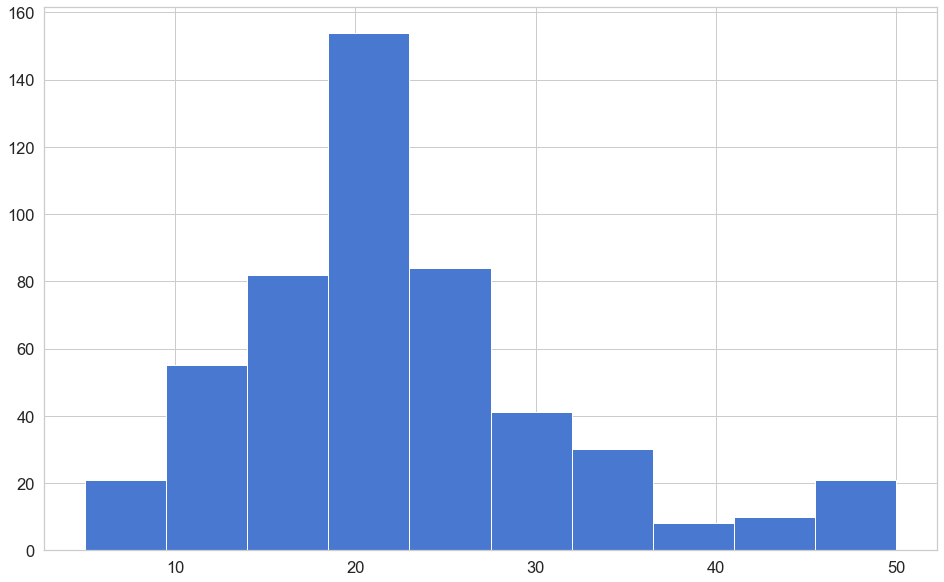

In [35]:
y = raw.pop('MEDV')
plt.hist(y)
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(raw,y,test_size = 0.2)
for x in [X_train, X_test, y_train, y_test]:
    print(len(x))

404
102
404
102


In [37]:
kfold = KFold(n_splits = 11, random_state = 42, shuffle = True)
#error func
def rrmse(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))
#neg_mean_squared_error
X = raw[:len(X_train)]

def cv_rmse(model,X=X_train, y=y_train):
    rmse = np.sqrt(-cross_val_score(model,X,y_train,scoring="neg_mean_squared_error", cv=kfold))
    return (rmse)

In [38]:
#RIDGE

ridge = Ridge()
params = {'alpha': [0.01,0.1,0.5,1,2,3,4,5,7,10,10.1,10.2,10.3,10.35,10.36,10.38,11,12,15]}
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

g_ridge = GridSearchCV(ridge,param_grid=params,cv=kfold,scoring='neg_mean_squared_error')
g_ridge.fit(X_train, y_train)
alpha = g_ridge.best_params_
ridge_score = g_ridge.best_score_

print('The best alpha is:',alpha['alpha'],', ridge score is:',ridge_score)

ridge_alpha = Ridge(alpha=alpha['alpha'])
ridge_alpha.fit(X_train,y_train)
y_pred_train = ridge_alpha.predict(X_train)

print('Ridge RMSE:',rrmse(y_train,y_pred_train))

The best alpha is: 2 , ridge score is: -21.33247019164325
Ridge RMSE: 4.396076061546379


In [39]:
y = y_train[:len(X_train)]

In [40]:
scores = {}
alphas_ridge=[0.1,0.5,1,2,3,5,7,10,10.5,11,12,15]
ridge = make_pipeline(RobustScaler(),RidgeCV(alphas=alphas_ridge,cv=kfold))
score = cv_rmse(ridge)
print(score)
print('ridge RMSE: {:.4f}'.format(score.mean()))
scores['ridge'] = score.mean()

[4.92853936 4.519834   4.30356586 6.08434529 5.78797495 3.46568032
 3.75552466 3.96993108 5.18751379 4.52222404 3.71868921]
ridge RMSE: 4.5676


In [41]:
## LASSO
alphas_lasso = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008] #Best value of alpha parmaters for lasso
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alphas_lasso, cv=kfold))
score = cv_rmse(lasso)
print(score)
print("lasso RMSE: {:.4f}".format(score.mean()))
scores['lasso'] = score.mean()
      

[5.0410819  4.48774584 4.33563423 5.98180306 5.45650596 3.64852223
 3.59769212 4.06012399 5.03783491 4.75922125 3.80797528]
lasso RMSE: 4.5649


In [42]:
##ELNET
alpha_elnet= [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
l1ratio_elnet = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1000000, alphas=alpha_elnet, 
                                                        cv=kfold, l1_ratio=l1ratio_elnet))
score=cv_rmse(elasticnet)
print(score)
print("Elasticnet RMSE: {:.4f}".format(score.mean()))
scores['elasticnet'] = (score.mean())

[5.04067317 4.48753796 4.33543047 5.98278395 5.45598966 3.64721387
 3.59928781 4.0592298  5.0386242  4.75813022 3.80618464]
Elasticnet RMSE: 4.5646


In [43]:
## SVR

svr = make_pipeline(RobustScaler(),SVR(C=19, epsilon = 0.008, gamma = 0.00015))
score = cv_rmse(svr)
print(score)
print('SVR RMSE: {:.4f}'.format(score.mean()))
scores['svr'] = score.mean()

[ 9.41584959  7.81771021  6.87989975  7.30780754 10.80398381  5.15366455
  8.74330229  5.753046    9.62046792  6.21933912  6.06379768]
SVR RMSE: 7.6163


In [44]:
#GBR

gbr = GradientBoostingRegressor(n_estimators=6000,learning_rate=0.01,max_depth=3, 
                                     min_samples_leaf=15,max_features='sqrt',min_samples_split=10,loss='huber',
                                     random_state=42)
score = cv_rmse(gbr)
print(score)
print('GBR RMSE: {:.4f}'.format(score.mean()))
scores['gbr'] = score.mean()

[3.5652482  3.64501223 2.96022055 5.85535682 4.92056856 2.45443324
 3.32006073 3.36191875 3.34608333 3.49840572 3.08578164]
GBR RMSE: 3.6376


In [45]:
#LGBM Regressor

lgbm = LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 6000,
                    max_bin = 200, bagging_fraction = 0.75, bagging_freq = 5, bagging_seed = 7,
                    feature_fraction = 0.2, feature_fraction_seed = 7, verbose = 0)
score = cv_rmse(lgbm)
print(score)
print('LGBM RMSE: {:.4f}'.format(score.mean()))
scores['lgbm'] = score.mean()

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_row_wise=true` to remo

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [46]:
#XGBOOST
xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460, max_depth=3, min_child_weight=0, gamma=0, subsample=0.7,
                                     colsample_bytree=0.7, objective='reg:squarederror', reg_alpha=0.00006)
score = cv_rmse(xgb)
print(score)
print('XGB RMSE: {:.4f}'.format(score.mean()))
scores['xgb'] = score.mean()

[3.73284089 3.15147916 2.76778229 5.7285147  3.5838571  2.77846483
 2.63180357 3.08781658 3.17736036 3.24052708 3.07505451]
XGB RMSE: 3.3596


In [47]:
stack_reg = StackingCVRegressor(regressors = (ridge, lasso, elasticnet, gbr, xgb, lgbm), meta_regressor = xgb,
                               use_features_in_secondary=True)

In [48]:
lasso_f = lasso.fit(X_train,y_train)
ridge_f = ridge.fit(X_train,y_train)
elasticnet_f = elasticnet.fit(X_train,y_train)
svr_f = svr.fit(X_train,y_train)
gbr_f = gbr.fit(X_train,y_train)
lgbm_f = lgbm.fit(X_train,y_train)
xgb_f = xgb.fit(X_train,y_train)
stack_reg_f = stack_reg.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [49]:
def blender(X): # I can tweak this
    return ((0.025* elasticnet_f.predict(X)) + 
            (0.025 * lasso_f.predict(X)) + 
            (0.025 * ridge_f.predict(X)) + 
            (0.0* svr_f.predict(X)) +  #this one was by far the worst and thus useless
            (0.60 * gbr_f.predict(X)) + 
            (0.05 * xgb_f.predict(X)) +  #added some to this one
            (0.05 * lgbm_f.predict(X)) + 
            (0.225 * stack_reg_f.predict(np.array(X))))



In [50]:
print('RMSLE score on train data:')
pred = blender(X_train)
blended_score=rrmse(y_train, pred)
print(blended_score)
print('R2 score on train data:', r2_score(y_train, pred))
scores['blended'] = blended_score

RMSLE score on train data:
1.4121558047731873
R2 score on train data: 0.9779533026042114


In [58]:
scores

{'ridge': 4.567620232789471,
 'lasso': 4.564921887299892,
 'elasticnet': 4.564644159563907,
 'svr': 7.61626076861923,
 'gbr': 3.6375536169657647,
 'lgbm': 3.7256979012224094,
 'xgb': 3.3595910062097216,
 'blended': 1.4121558047731873}

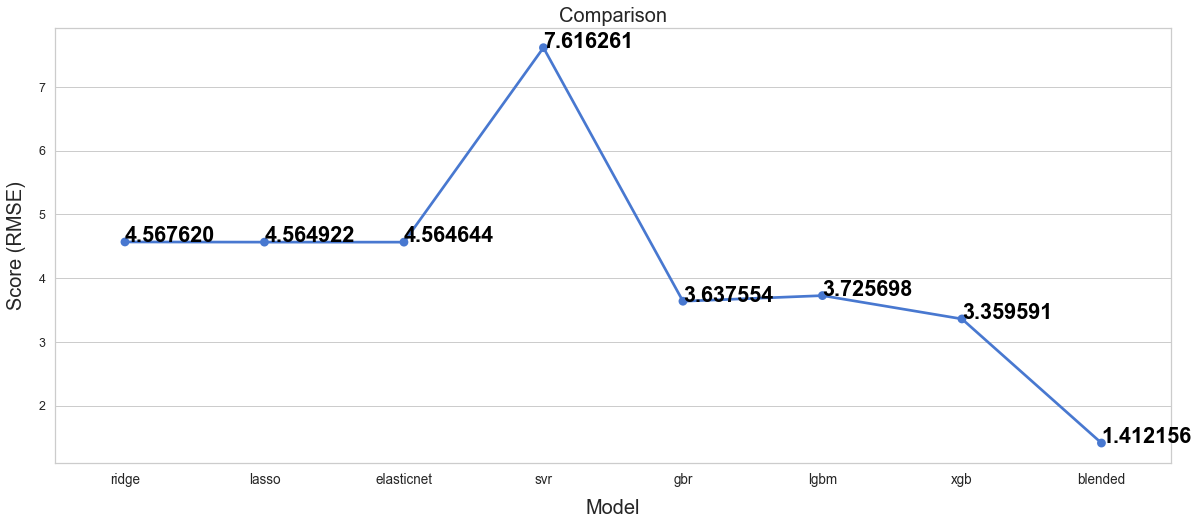

In [55]:
fig = plt.figure(figsize=(20, 8))

ax = sns.pointplot(x=list(scores.keys()), y=[score for score in scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(scores.values()):
    ax.text(i, score, '{:.6f}'.format(score), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Comparison', size=20)

plt.show()

## SHOWTIME

In [52]:
y_pred = blender(X_test) #nejlepsi +- 0.92
print(r2_score(y_test, y_pred))

0.899781802841423


In [57]:
rrmse(y_test, y_pred)

2.449585612540704

In [60]:
def blender2(X): # I can tweak this
    return ((0.25 * gbr_f.predict(X)) + 
            (0.25 * xgb_f.predict(X)) +  
            (0.25 * lgbm_f.predict(X)) + 
            (0.25 * stack_reg_f.predict(np.array(X))))


In [61]:
y_pred2 = blender2(X_test)
print(r2_score(y_test, y_pred2))
print(rrmse(y_test, y_pred2))

0.8997443170691475
2.4500436931393095


In [62]:
def blender3(X): # I can tweak this
    return ((0.3 * gbr_f.predict(X)) + 
            (0.4 * xgb_f.predict(X)) +  
            (0.3 * lgbm_f.predict(X)))

y_pred3 = blender3(X_test)
print(r2_score(y_test, y_pred3))
print(rrmse(y_test, y_pred3))

0.9006686279775505
2.438723407388296
